# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB
None
       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963

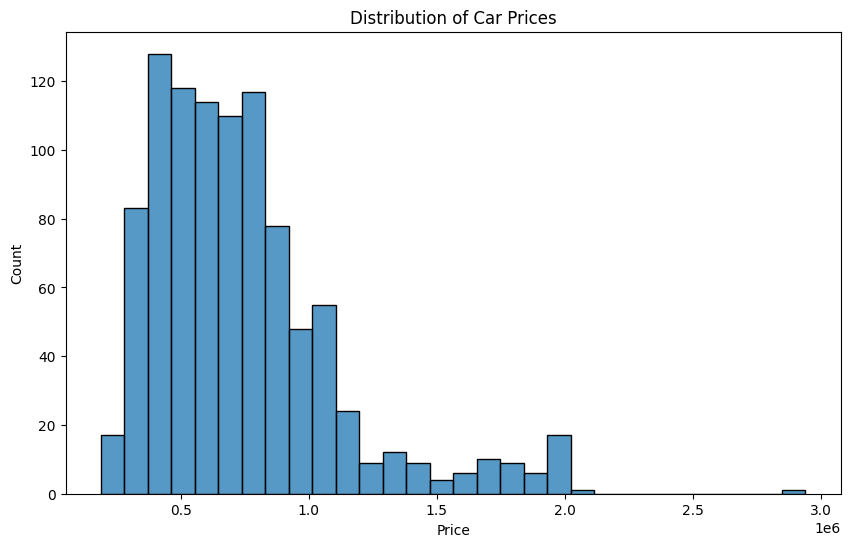

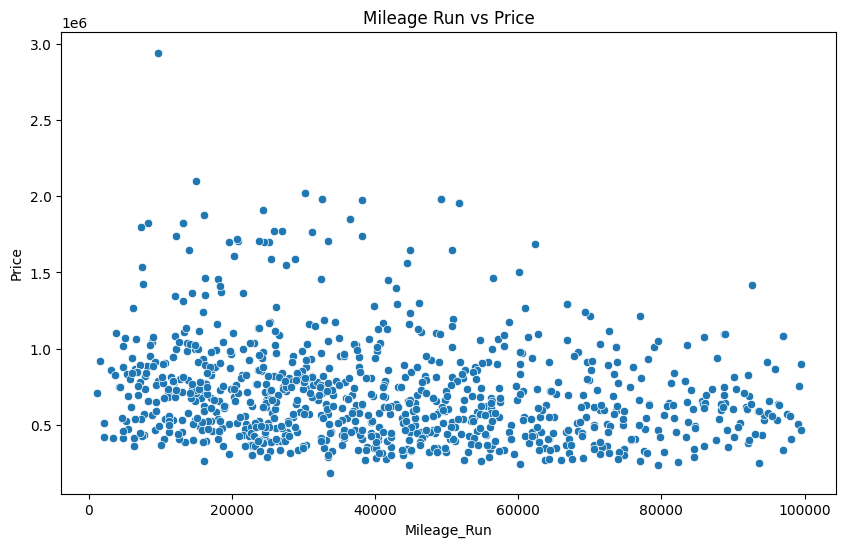

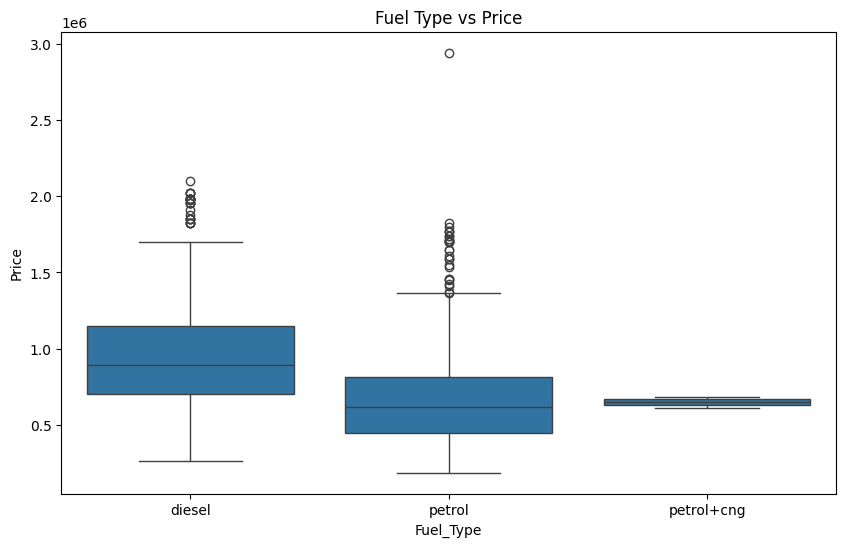

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

cars_df = pd.read_csv("cars_hw.csv")

print(cars_df.info())
print(cars_df.describe())

print(cars_df.isnull().sum())
cars_df = cars_df.dropna()

plt.figure(figsize = (10, 6))
sns.histplot(cars_df['Price'], bins = 30)
plt.title("Distribution of Car Prices")
plt.show()

plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Mileage_Run', y = 'Price', data = cars_df)
plt.title("Mileage Run vs Price")
plt.show()

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Fuel_Type', y = 'Price', data = cars_df)
plt.title("Fuel Type vs Price")
plt.show()

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [3]:
cars_df = pd.get_dummies(cars_df, columns = ['Fuel_Type', 'Transmission', 'Body_Type'], drop_first = True)

cars_df['Price'] = np.log(cars_df['Price'])

X = cars_df.drop(columns = ['Price'])
y = cars_df['Price']

3. Implement an ~80/~20 train-test split. Put the test data aside.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [7]:
simple_features = ['Mileage_Run', 'Seating_Capacity']
X_train_simple = X_train[simple_features]
X_test_simple = X_test[simple_features]

simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)

y_train_pred_simple = simple_model.predict(X_train_simple)
train_rmse_simple = mean_squared_error(y_train, y_train_pred_simple, squared = False)
train_r2_simple = r2_score(y_train, y_train_pred_simple)

y_test_pred_simple = simple_model.predict(X_test_simple)
test_rmse_simple = mean_squared_error(y_test, y_test_pred_simple, squared = False)
test_r2_simple = r2_score(y_test, y_test_pred_simple)

print("Simple Model - Training RMSE:", train_rmse_simple)
print("Simple Model - Training R^2:", train_r2_simple)
print("Simple Model - Test RMSE:", test_rmse_simple)
print("Simple Model - Test R^2:", test_r2_simple)


Simple Model - Training RMSE: 0.44658516201604426
Simple Model - Training R^2: 0.04207144584244915
Simple Model - Test RMSE: 0.4135051761207512
Simple Model - Test R^2: 0.03483163538969736


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


> In the simple model, the performance was rather low altogether. The Training RMSE was around .45 with an $R^2$ of 0.042 which suggests that the model explains only 4% of the variance in the training data. On the Test RMSE the value was lower at 0.41 with an $R^2$ of 0.035. This suggests that both models are underfitting though the Training RMSE is slightly better. 

5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [9]:
X_train['Mileage_Run^2'] = X_train['Mileage_Run'] ** 2
X_test['Mileage_Run^2'] = X_test['Mileage_Run'] ** 2

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_train, X_test = X_train.align(X_test, join = 'left', axis = 1, fill_value = 0)

complex_model = LinearRegression()
complex_model.fit(X_train, y_train)

y_train_pred_complex = complex_model.predict(X_train)
train_rmse_complex = mean_squared_error(y_train, y_train_pred_complex, squared = False)
train_r2_complex = r2_score(y_train, y_train_pred_complex)

y_test_pred_complex = complex_model.predict(X_test)
test_rmse_complex = mean_squared_error(y_test, y_test_pred_complex, squared = False)
test_r2_complex = r2_score(y_test, y_test_pred_complex)

print("Complex Model - Training RMSE:", train_rmse_complex)
print("Complex Model - Training R^2:", train_r2_complex)
print("Complex Model - Test RMSE:", test_rmse_complex)
print("Complex Model - Test R^2:", test_r2_complex)


Complex Model - Training RMSE: 0.18014334964864845
Complex Model - Training R^2: 0.8441305481521395
Complex Model - Test RMSE: 0.20008653749701705
Complex Model - Test R^2: 0.7740164037440241


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


> The complex model performed much better than the simple models- shwon through the Training RMSE of 0.18 and the $R^2$ of 0.84, explaining roughly 84% of the variance. On the test set, the complex model managed an RMSE of 0.2 and an $R^2$ of 0.77. Both of which are much stronger in comparison to the simple model shown above. 

6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?

> After working with the data, key transformations and encoding were applied to variables to prepare the data for modeling. The initial simple model, with low $R^2$ values (0.042 for training and 0.035 for testing) and high RMSE, underfit the data, capturing only limited variability in car prices. In contrast, the complex model—which incorporated variable interactions and transformations—showed a substantial improvement, achieving a training $R^2$ of 0.84 and a test $R^2$ of 0.77, along with lower RMSE values. This indicated that the complex model captured key relationships without overfitting-  evident by its performance on both the training and test sets. This showed the importance of balanced model complexity: a simple model can underfit and fail to capture essential data relationships, while a well-tuned complex model can enhance predictive accuracy without sacrificing generalizability.

7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.